# Notebook 0 - Exploratory Analysis

# Curso de Especialização em Data Science

## ITA - Instituto Tecnológico de Aeronáutica

## Trabalho de Conclusão de Curso

__CEDS Skin Cancer MNIST: HAM10000__

* Aluno: Lorenzo Cano Cesconetto

* Orientador: Filipe Verri

### 1. Setup constants

In [1]:
%matplotlib inline

In [2]:
from constants import *

### 2. Imports and notebook setup

In [3]:
# Set up multiple outputs for cells
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Printing with markdown
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

In [4]:
# Default imports
import os
import random
import shutil
from send2trash import send2trash
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import cv2

### 3. Exploring data

In [5]:
img = plt.imread(os.path.join(DATA_ORIGINAL_DIR_PATH, 'HAM10000_images_part_1', 'ISIC_0024319.jpg'))
img.shape

(450, 600, 3)

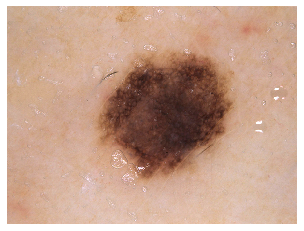

In [22]:
_ = plt.imshow(img)
_ = plt.axis('off')
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())

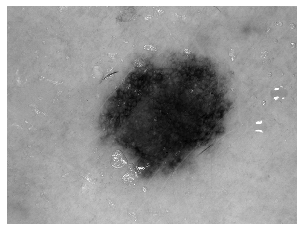

In [23]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_ = plt.imshow(gray, cmap='gray')
_ = plt.axis('off')
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())

(1024, 1024, 3)

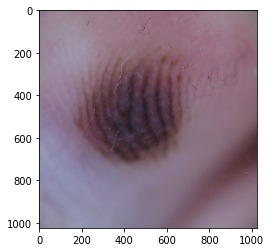

In [8]:
img = plt.imread(os.path.join(NEW_DATA_DIR_PATH, 'ISIC_2019_Training_Input', 'ISIC_0073251.jpg'))
img.shape
_ = plt.imshow(img)

In [6]:
df_2019 = pd.read_csv('../ISIC-2019/ISIC_2019_Training_Metadata.csv')
df_2019_target = pd.read_csv('../ISIC-2019/ISIC_2019_Training_GroundTruth.csv', 
                             index_col='image').drop('UNK', axis=1)

In [7]:
df_2019_target = df_2019_target.astype(int)

In [8]:
df = pd.merge(left=df_2019_target, right=df_2019[['image', 'lesion_id', 'sex', 'age_approx', 'anatom_site_general']], 
              on='image', how='left')
# Set index
df.set_index('image', inplace=True)

# Setup diagnostic column
df['dx'] = df.drop(['lesion_id', 'sex', 'age_approx', 'anatom_site_general'], axis=1).idxmax(axis=1).str.lower()

In [9]:
num_of_missing = df['lesion_id'].isnull().sum()
fill_missing_values = ['missing_' + str(x) for x in range(num_of_missing)]
    
null_indices = df[df['lesion_id'].isna()].index
for i, fill_label in zip(null_indices, fill_missing_values):
    df.loc[i, 'lesion_id'] = fill_label

In [10]:
df.lesion_id.value_counts()

BCN_0001728    31
BCN_0003369    27
BCN_0001321    26
BCN_0003196    24
BCN_0001954    21
               ..
HAM_0002200     1
HAM_0007128     1
HAM_0001628     1
HAM_0003285     1
HAM_0002725     1
Name: lesion_id, Length: 13931, dtype: int64

In [11]:
df[df['lesion_id'] == 'BCN_0001728'].head()

,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,lesion_id,sex,age_approx,anatom_site_general,dx
image,,,,,,,,,,,,,
ISIC_0053824,1,0,0,0,0,0,0,0,BCN_0001728,male,50.0,anterior torso,mel
ISIC_0056537,1,0,0,0,0,0,0,0,BCN_0001728,male,50.0,anterior torso,mel
ISIC_0056915,1,0,0,0,0,0,0,0,BCN_0001728,male,50.0,anterior torso,mel
ISIC_0057744,1,0,0,0,0,0,0,0,BCN_0001728,male,50.0,anterior torso,mel
ISIC_0057828,1,0,0,0,0,0,0,0,BCN_0001728,male,50.0,anterior torso,mel


In [12]:
print('Number of distinct lesions:', len(df.lesion_id.unique()))
print('Number of images:', len(df))
print('Number of lesions with multiple images:', sum(df.lesion_id.value_counts() > 1))
df.head()

Number of distinct lesions: 13931
Number of images: 25331
Number of lesions with multiple images: 5059


,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,lesion_id,sex,age_approx,anatom_site_general,dx
image,,,,,,,,,,,,,
ISIC_0000000,0,1,0,0,0,0,0,0,missing_0,female,55.0,anterior torso,nv
ISIC_0000001,0,1,0,0,0,0,0,0,missing_1,female,30.0,anterior torso,nv
ISIC_0000002,1,0,0,0,0,0,0,0,missing_2,female,60.0,upper extremity,mel
ISIC_0000003,0,1,0,0,0,0,0,0,missing_3,male,30.0,upper extremity,nv
ISIC_0000004,1,0,0,0,0,0,0,0,missing_4,male,80.0,posterior torso,mel


In [9]:
# df = pd.read_csv(os.path.join(DATA_ORIGINAL_DIR_PATH, 'HAM10000_metadata.csv'))
# df.set_index('image_id', inplace=True)
# print('Number of distinct lesions:', len(df.lesion_id.unique()))
# print('Number of images:', len(df.index.unique()))
# print('Number of lesions with multiple images:', sum(df.lesion_id.value_counts() > 1))
# df.head()

Number of distinct lesions: 7470
Number of images: 10015
Number of lesions with multiple images: 1956


,lesion_id,dx,dx_type,age,sex,localization
image_id,,,,,,
ISIC_0027419,HAM_0000118,bkl,histo,80.0,male,scalp
ISIC_0025030,HAM_0000118,bkl,histo,80.0,male,scalp
ISIC_0026769,HAM_0002730,bkl,histo,80.0,male,scalp
ISIC_0025661,HAM_0002730,bkl,histo,80.0,male,scalp
ISIC_0031633,HAM_0001466,bkl,histo,75.0,male,ear


In [13]:
df['dx'].value_counts() / len(df)
df['dx'].value_counts()

nv      0.508270
mel     0.178516
bcc     0.131183
bkl     0.103588
ak      0.034227
scc     0.024792
vasc    0.009988
df      0.009435
Name: dx, dtype: float64

nv      12875
mel      4522
bcc      3323
bkl      2624
ak        867
scc       628
vasc      253
df        239
Name: dx, dtype: int64

In [14]:
# Average number of images for each class
df.groupby('lesion_id').agg({'dx': lambda x: x[0], 'sex': 'count'}).groupby('dx').mean()

,sex
dx,
ak,2.666667
bcc,2.532061
bkl,1.773006
df,2.115044
mel,2.649761
nv,1.458121
scc,2.396947
vasc,1.874074


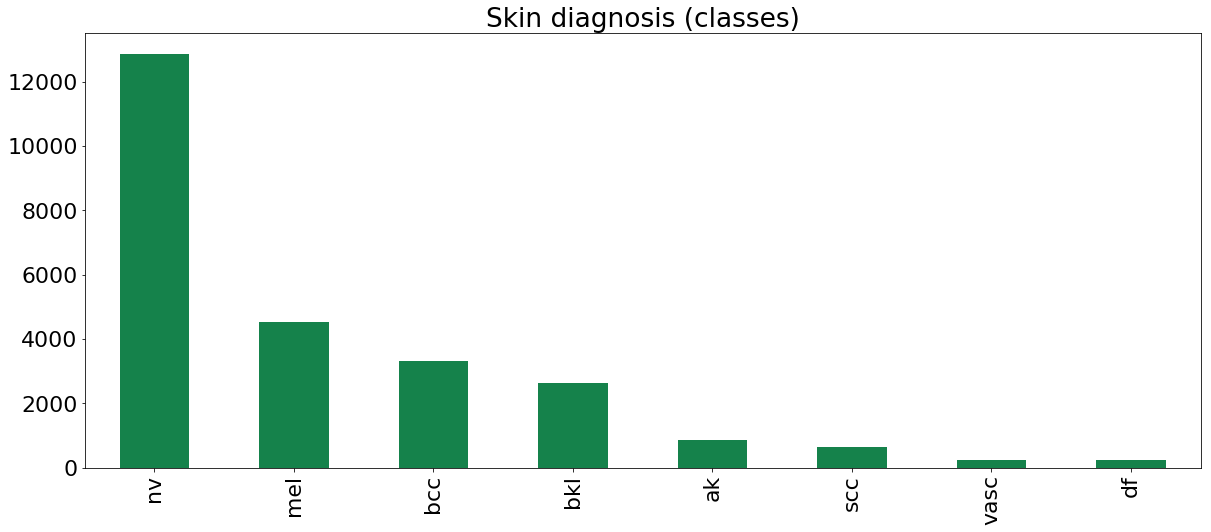

In [21]:
import matplotlib
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)

_ = df.dx.value_counts().plot(kind='bar', color='#15824B', title='Skin diagnosis (classes)', figsize=(20, 8))

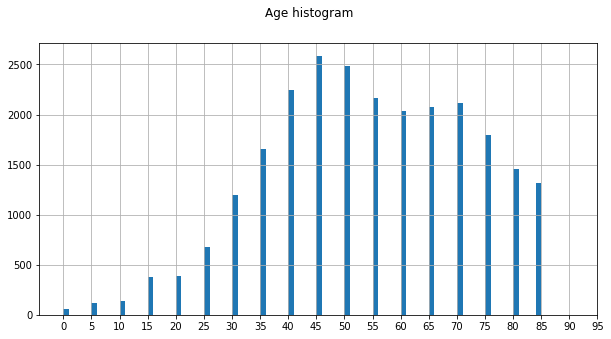

In [38]:
_ = df.age_approx.hist(figsize=(10, 5), bins=range(0, 86))
_ = pl.suptitle('Age histogram')
_ = pl.xticks(np.arange(0, 100, step=5))

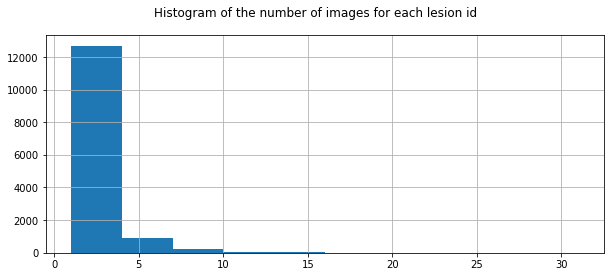

In [40]:
_ = (df.lesion_id.value_counts()).hist(figsize=(10, 4))
_ = pl.suptitle('Histogram of the number of images for each lesion id')

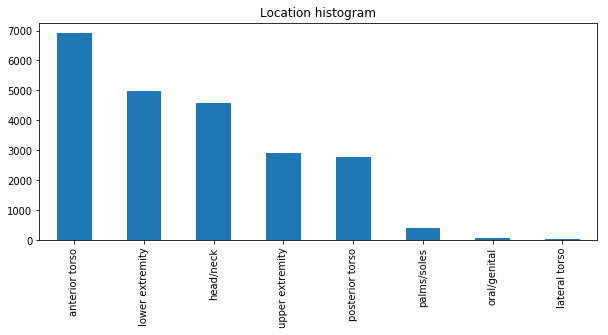

In [44]:
_ = df['anatom_site_general'].value_counts().plot(kind='bar', title='Location histogram', figsize=(10, 4))

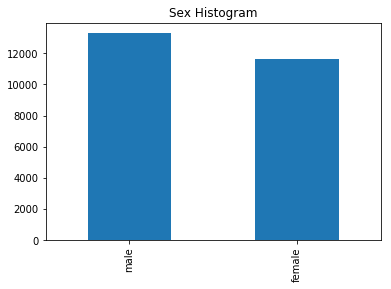

In [45]:
_ = df.sex.value_counts().plot(kind='bar', title='Sex Histogram')